# Regularization and Optimization in Neural Networks

## Regularization of NNs

Does regularization make sense in the context of neural networks? <br/>

Yes! We still have all of the salient ingredients: a loss function, overfitting vs. underfitting, and coefficients (weights) that could get too large.

But there are now a few different flavors besides L1 and L2 regularization. (Note that L1 regularization is not common in the context of  neural networks.)

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical #basically for one hot encoding the Y, output (wine dataset: "quality")
from matplotlib import pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
# Reading in the dataset

wine = pd.read_csv('wine.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [3]:
# Investigating our target

wine['quality'].value_counts() #7 possibilities from rating 3-9

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [4]:
# Re-calibrating

wine['quality'] = wine['quality'].map(lambda x: x-3)

In [5]:
wine['quality'].value_counts()

3    2836
2    2138
4    1079
1     216
5     193
0      30
6       5
Name: quality, dtype: int64

In [6]:
# Defining X and y

X = wine.drop('quality',axis=1)
y = wine['quality']

In [7]:
# Splitting and scaling

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42, stratify=y)

ss = StandardScaler()
X_train_s = ss.fit_transform(X_train)
X_test_s = ss.transform(X_test)

/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys


In [8]:
y_train[:5]

139     2
5010    3
3969    4
2053    4
6189    3
Name: quality, dtype: int64

In [9]:
# Encoding our target

y_train = to_categorical(y_train) #run only once

In [10]:
y_train

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [11]:
y_test = to_categorical(y_test) #run only once

In [12]:
# Constructing our model

model = Sequential()
n_input = X_train_s.shape[1]
n_hidden = n_input

model.add(Dense(n_hidden, input_dim=n_input, activation='relu'))

# We want to predict probabilities, so we'll use a softmax activation
#7 neurons because of the 7 quality types
model.add(Dense(7, activation='softmax'))

In [13]:
# Compiling: 
# Taking model that was just built, and state loss function, optimizer, and metrics BEFORE fit

# We want to use categorical crossentropy as our optimizer

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc']) 

In [14]:
# Fitting and saving the history log

history_log = model.fit(X_train_s, y_train, 
                        validation_data=(X_test_s, y_test), 
                        epochs=42, batch_size=None) 


Train on 4872 samples, validate on 1625 samples
Epoch 1/42
4872/4872 [==============================] - 1s 138us/step - loss: 1.8758 - acc: 0.3044 - val_loss: 1.5648 - val_acc: 0.4277
Epoch 2/42
4872/4872 [==============================] - 0s 78us/step - loss: 1.4126 - acc: 0.4702 - val_loss: 1.3276 - val_acc: 0.4812
Epoch 3/42
4872/4872 [==============================] - 0s 81us/step - loss: 1.2562 - acc: 0.4918 - val_loss: 1.2349 - val_acc: 0.5095
Epoch 4/42
4872/4872 [==============================] - 1s 158us/step - loss: 1.1893 - acc: 0.5121 - val_loss: 1.1930 - val_acc: 0.5218
Epoch 5/42
4872/4872 [==============================] - 0s 75us/step - loss: 1.1523 - acc: 0.5300 - val_loss: 1.1702 - val_acc: 0.5262
Epoch 6/42
4872/4872 [==============================] - 0s 54us/step - loss: 1.1282 - acc: 0.5384 - val_loss: 1.1537 - val_acc: 0.5243
Epoch 7/42
4872/4872 [==============================] - 0s 63us/step - loss: 1.1124 - acc: 0.5462 - val_loss: 1.1418 - val_acc: 0.5335
Epoch

In [15]:
# Extracting weights

for layer in model.layers:
    print(layer.get_weights())

[array([[ 0.1617428 , -0.51237345,  0.10222707, -0.45618522,  0.3477024 ,
         0.16189064,  0.48079967, -0.02230092, -0.20138855, -0.23320821,
         0.34446815, -0.3981036 ],
       [-0.10967002,  0.07365294, -0.25677976,  0.06033879,  0.14416039,
        -0.17235203,  0.23881349, -0.25837407, -0.8148812 ,  0.53095937,
        -0.29507655, -0.05594992],
       [-0.16103622, -0.19217397,  0.04254761,  0.02799624,  0.1125617 ,
        -0.10208945, -0.07176718, -0.27512974, -0.15515412,  0.31141213,
        -0.05445269,  0.325352  ],
       [-0.40815476, -0.8899685 ,  0.2639596 , -0.46320015,  0.17019764,
        -0.47961888, -0.64264506, -0.42063642,  0.4928826 ,  0.3907708 ,
        -0.5870757 , -0.32811317],
       [-0.12559956, -0.3197043 , -0.04012327, -0.3845276 , -0.2605967 ,
         0.27595434, -0.1209896 , -0.03239477, -0.617146  ,  0.25824913,
        -0.00127827,  0.26222095],
       [ 0.10335086,  0.0985195 ,  0.30656645,  0.2943049 ,  0.00164214,
         0.40364373, 

In [16]:
# Predicting on some test data

model.predict(X_test_s[:5]).round(decimals=2) #each row should sum to 1.0 given softmax

array([[0.  , 0.  , 0.99, 0.01, 0.  , 0.  , 0.  ],
       [0.01, 0.04, 0.68, 0.23, 0.03, 0.  , 0.  ],
       [0.01, 0.02, 0.32, 0.58, 0.07, 0.  , 0.  ],
       [0.  , 0.  , 0.18, 0.56, 0.23, 0.02, 0.  ],
       [0.01, 0.01, 0.19, 0.58, 0.21, 0.  , 0.  ]], dtype=float32)

In [17]:
model.predict_classes(X_test_s[:5])

array([2, 2, 3, 3, 3])

In [18]:
# Comparing with reality

y_test[:5] 
#model predictions almost sort of match up with up with actual reality

array([[0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

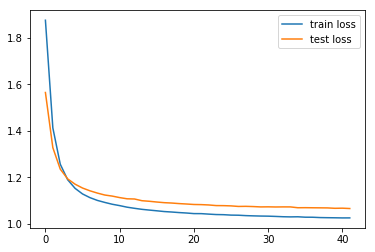

In [19]:
# Plotting

plt.plot(history_log.history['loss'], label = 'train loss')
plt.plot(history_log.history['val_loss'], label = 'test loss')
plt.legend();

- test loss begins to plateau with 42 epochs
- Let's see if kera.regularizers (Regularization) can help improve our model a bit

## Adding Regularization

In [20]:
from keras import regularizers

model_r = Sequential()

n_input = X_train_s.shape[1]
n_hidden = n_input

model_r.add(Dense(n_hidden, input_dim=n_input, activation='relu',
                 kernel_regularizer=regularizers.l2(0.01))) #add L2 regularizer (L1-L2 ratio: 0.01: 0.99)
model_r.add(Dense(7, activation='softmax',
                 kernel_regularizer=regularizers.l2(0.01))) #add L2 regularizer (L1-L2 ratio: 0.01: 0.99)

model_r.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

history_r = model_r.fit(X_train_s, y_train, validation_data=(X_test_s, y_test),
                       epochs=42, batch_size=None)

Train on 4872 samples, validate on 1625 samples
Epoch 1/42
4872/4872 [==============================] - 0s 100us/step - loss: 2.0110 - acc: 0.3596 - val_loss: 1.6954 - val_acc: 0.4757
Epoch 2/42
4872/4872 [==============================] - 0s 62us/step - loss: 1.5629 - acc: 0.5051 - val_loss: 1.4870 - val_acc: 0.5145
Epoch 3/42
4872/4872 [==============================] - 0s 63us/step - loss: 1.4223 - acc: 0.5172 - val_loss: 1.3903 - val_acc: 0.5194
Epoch 4/42
4872/4872 [==============================] - 0s 55us/step - loss: 1.3468 - acc: 0.5248 - val_loss: 1.3296 - val_acc: 0.5218
Epoch 5/42
4872/4872 [==============================] - 0s 58us/step - loss: 1.2965 - acc: 0.5283 - val_loss: 1.2876 - val_acc: 0.5237
Epoch 6/42
4872/4872 [==============================] - 0s 60us/step - loss: 1.2625 - acc: 0.5363 - val_loss: 1.2593 - val_acc: 0.5218
Epoch 7/42
4872/4872 [==============================] - 0s 58us/step - loss: 1.2374 - acc: 0.5394 - val_loss: 1.2387 - val_acc: 0.5255
Epoch 

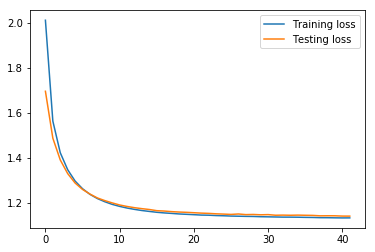

In [21]:
plt.plot(history_r.history['loss'], label='Training loss')
plt.plot(history_r.history['val_loss'], label='Testing loss')
plt.legend();

### Dropout

Here's a new regularization idea: Turn some neurons off during training. We'll assign probabilities of 'dropout' and then let fate decide.

$\rightarrow$ Why is this a good idea? *Is* it a good idea?

Was this sort of regularization available to us before? Why (not)?

- this was never available us before
- in linear regression, you're either using the feature or not

In [22]:
from keras.layers import Dropout
#TRYING TO NOT LET IT GET TOO CAUGHT UP ON ANY ONE FEATURE
#RANDOMIZES WHICH NEURONS TO TURN OFF EVERY EPOCH

model_d = Sequential()

n_input = X_train_s.shape[1]
n_hidden = n_input

In [23]:
model_d.add(Dense(n_hidden, input_dim=n_input, activation='relu'))
model_d.add(Dropout(rate=0.2)) #fraction of the input units too drop
model_d.add(Dense(7, activation='softmax'))

model_d.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

history_d = model_d.fit(X_train_s, y_train, validation_data=(X_test_s, y_test),
                       epochs=42, batch_size=None)

Train on 4872 samples, validate on 1625 samples
Epoch 1/42
4872/4872 [==============================] - 1s 120us/step - loss: 1.9762 - acc: 0.2826 - val_loss: 1.6019 - val_acc: 0.4283
Epoch 2/42
4872/4872 [==============================] - 0s 95us/step - loss: 1.5172 - acc: 0.4269 - val_loss: 1.3672 - val_acc: 0.4818
Epoch 3/42
4872/4872 [==============================] - 0s 80us/step - loss: 1.3453 - acc: 0.4748 - val_loss: 1.2610 - val_acc: 0.5182
Epoch 4/42
4872/4872 [==============================] - 0s 78us/step - loss: 1.2731 - acc: 0.4871 - val_loss: 1.2076 - val_acc: 0.5286
Epoch 5/42
4872/4872 [==============================] - 0s 76us/step - loss: 1.2269 - acc: 0.4992 - val_loss: 1.1737 - val_acc: 0.5317
Epoch 6/42
4872/4872 [==============================] - 0s 73us/step - loss: 1.1971 - acc: 0.5150 - val_loss: 1.1488 - val_acc: 0.5298
Epoch 7/42
4872/4872 [==============================] - 0s 72us/step - loss: 1.1721 - acc: 0.5244 - val_loss: 1.1312 - val_acc: 0.5360
Epoch 

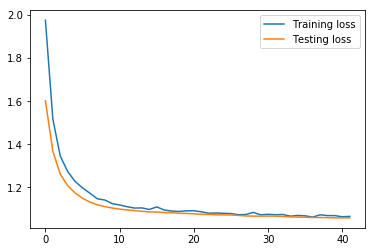

In [24]:
plt.plot(history_d.history['loss'], label='Training loss')
plt.plot(history_d.history['val_loss'], label='Testing loss')
plt.legend();

In [25]:
history_d.history['acc'][-1], history_d.history['val_acc'][-1]

(0.5513136288998358, 0.5439999997065618)

### Early Stopping

Another idea is to try to terminate the training process early, even before some pre-specified number of epochs.

$\rightarrow$ Why is this a good idea? *Is* it a good idea?

Was this sort of regularization available to us before? Why (not)?

- Helps us to avoid overfitting to training data, especially with MANY epochs
- can set this to kick in WHEN THE CHANGE IN THE TESTING LOSS BECOMES REALLY SMALL/PROGRESS BECOMES INSIGNIFICANT

In [26]:
from keras.callbacks import EarlyStopping

In [27]:
from keras.callbacks import EarlyStopping

model_es = Sequential()

n_input = X_train_s.shape[1]
n_hidden = n_input

model_es.add(Dense(n_hidden, input_dim=n_input, activation='relu'))
model_es.add(Dense(7, activation='softmax'))

model_es.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

early_stop = EarlyStopping(monitor='val_loss', min_delta=1e-08, patience=0, verbose=1, mode='auto')
#when change gets below min_delta, patience=0 means stop right away
#patience > 0 tells it your propensity for epochs without additional progress

callbacks_list = [early_stop]

history_es = model_es.fit(X_train_s, y_train, validation_data=(X_test_s, y_test),
                         epochs=42, batch_size=None, callbacks=callbacks_list)

Train on 4872 samples, validate on 1625 samples
Epoch 1/42
4872/4872 [==============================] - 1s 165us/step - loss: 1.8526 - acc: 0.3003 - val_loss: 1.5494 - val_acc: 0.4320
Epoch 2/42
4872/4872 [==============================] - 0s 101us/step - loss: 1.4025 - acc: 0.4612 - val_loss: 1.3313 - val_acc: 0.4702
Epoch 3/42
4872/4872 [==============================] - 1s 104us/step - loss: 1.2505 - acc: 0.4865 - val_loss: 1.2358 - val_acc: 0.4831
Epoch 4/42
4872/4872 [==============================] - 0s 93us/step - loss: 1.1817 - acc: 0.5156 - val_loss: 1.1904 - val_acc: 0.5077
Epoch 5/42
4872/4872 [==============================] - 0s 79us/step - loss: 1.1461 - acc: 0.5296 - val_loss: 1.1639 - val_acc: 0.5052
Epoch 6/42
4872/4872 [==============================] - 0s 84us/step - loss: 1.1244 - acc: 0.5341 - val_loss: 1.1485 - val_acc: 0.5169
Epoch 7/42
4872/4872 [==============================] - 0s 73us/step - loss: 1.1092 - acc: 0.5382 - val_loss: 1.1359 - val_acc: 0.5188
Epoc

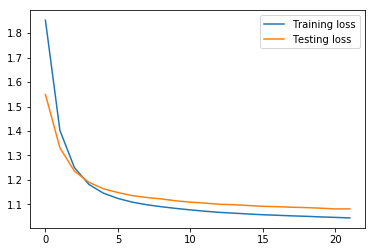

In [28]:
plt.plot(history_es.history['loss'], label='Training loss')
plt.plot(history_es.history['val_loss'], label='Testing loss')
plt.legend();